# this is multiclass classification problem

In [1]:
#just need to learn how can we handle mutli-class problem using ANN

In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [4]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train[0].shape  #rows

(28, 28)

In [7]:
X_train[1].shape #columns

(28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

In [10]:
y_train  #label like which image is there(which digit in the paritcual image)

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

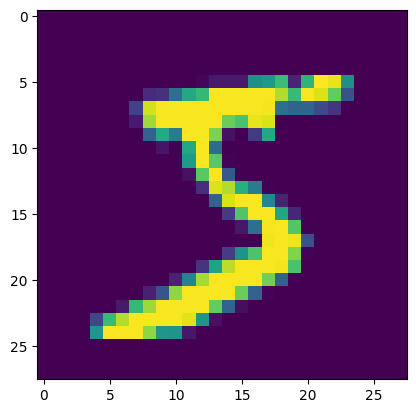

In [11]:
#we can convert this pixel values in image also and see

import matplotlib.pyplot as plt
plt.imshow(X_train[0])

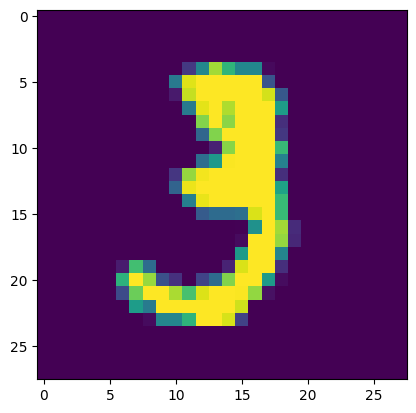

In [12]:
plt.imshow(X_train[10])

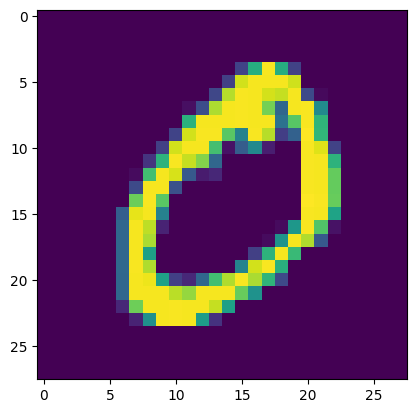

In [13]:
plt.imshow(X_train[1])

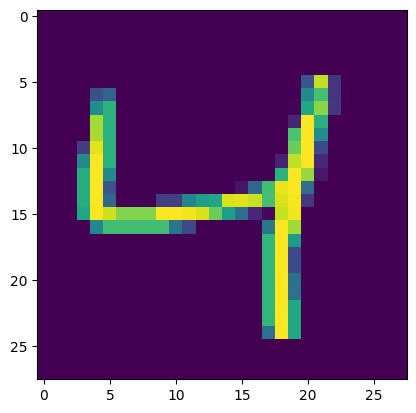

In [15]:
plt.imshow(X_train[2])  #same we got in array (pixels)

In [16]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [17]:
#28*28

#we have values from 0 to 255
#so before building the model

#we will bring array values b/w 0 and 1 bcoz when we train neural netowrk when values are in same range so we gets correct weight and fast convergenecce

#so we will divide all values by 255 it will come in the range of 0 and 1

X_train = X_train/255
x_test = X_test/255

In [18]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# now we need to make our architectural neural netowrk

In [19]:
#create a model obj

model = Sequential()

In [20]:
#here we will add the layers to model
#but we have one problem we need to give 784 input in our first layer
#but data is in 28*28 format so need to flatten it first then we will give the input --->convert higher-D array into 1-D array
model.add(Flatten(input_shape=(28,28)))  #this will convert into 1-D 784 inputs
model.add(Dense(128,activation='relu'))  #here 128 nodes and no need to define no. of inputs bcoz flatten output will directly go to Dense
model.add(Dense(10,activation='softmax'))  #here 10 outpurs 0,1,2...9 and when we have more than one node in output then we use softmax function for classification

D:\Anaconda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
#now we just need to complie and train our model and learn from which pattern which digit id formed

In [45]:
#sparse_categorical_crossentropy in this we don't have to do one hot like we have 0,1,2..9 na
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [36]:
#now we need to train
model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0051 - val_loss: 0.1285
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0037 - val_loss: 0.1315
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0038 - val_loss: 0.1248
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0043 - val_loss: 0.1244
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0028 - val_loss: 0.1183
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0036 - val_loss: 0.1321
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0030 - val_loss: 0.1368
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0023 - val_loss: 0.1406
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0038 - val_loss: 0.1342
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0016 - val_loss: 0.1414


In [46]:
#let's store in history
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9990 - loss: 0.0031 - val_accuracy: 0.9751 - val_loss: 0.1535
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9992 - loss: 0.0021 - val_accuracy: 0.9783 - val_loss: 0.1425
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9994 - loss: 0.0023 - val_accuracy: 0.9758 - val_loss: 0.1567
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9989 - loss: 0.0030 - val_accuracy: 0.9774 - val_loss: 0.1441
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9994 - loss: 0.0021 - val_accuracy: 0.9785 - val_loss: 0.1398
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9998 - loss: 9.7854e-04 - val_accuracy: 0.9753 - val_loss: 0.1578
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9992 - loss: 0.0025 - val_accuracy: 0.9773 - val_loss: 0.1501
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9990 - loss:

In [47]:
#now we will do the preiction
model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [48]:
#let's store the probn
y_prob = model.predict(X_test)

#we got only prob
#but we need to show that which image will form
#so we need to find the max prob in each row like at which index we have the max prob that index image only will be formed

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [49]:
y_prob.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [50]:
#let's store the y_pred
y_pred = y_prob.argmax(axis=1)

In [51]:
#now let's see the accuracy and all
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9805

In [52]:
#let's improve the accuray by following steps
#1.change the architecture like add more nodes or increase no. of layers
#2.can increase the number of epochs

In [53]:
#now let's see the grapgh

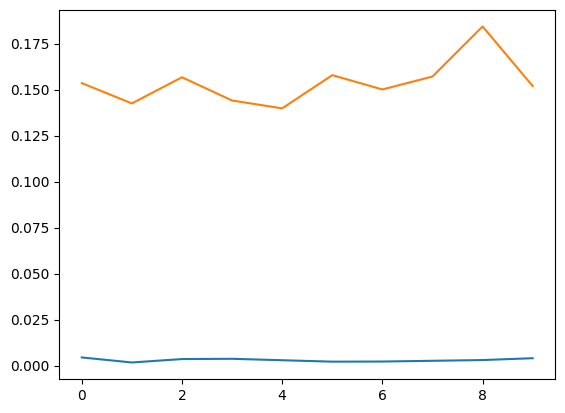

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

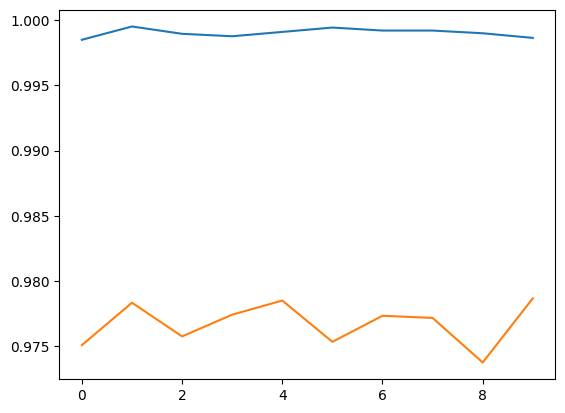

In [55]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

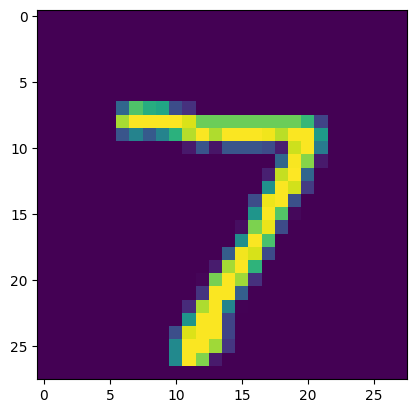

In [56]:
plt.imshow(X_test[0])

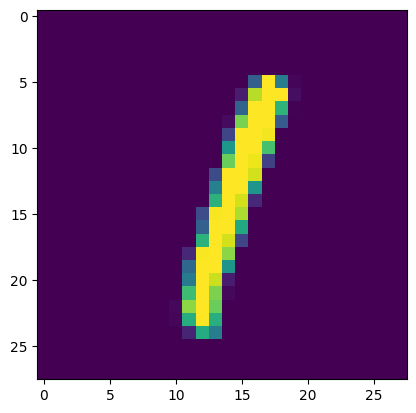

In [59]:
plt.imshow(X_test[5])

In [58]:
#let's do prediction
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


array([7], dtype=int64)

In [60]:
model.predict(X_test[5].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


array([1], dtype=int64)

In [61]:
#correct prediction